In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [7]:
Tesla_data = pd.read_csv("tesla.csv")
Head_data = Tesla_data.head()
Tesla_data['Date'] = pd.to_datetime(Tesla_data['Date'])

In [9]:
print(f'Dataframe contains stock prices between {Tesla_data.Date.min()} {Tesla_data.Date.max()}')
print(f'Total days = {(Tesla_data.Date.max() - Tesla_data.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2019-03-15 00:00:00
Total days = 3181 days


<Axes: >

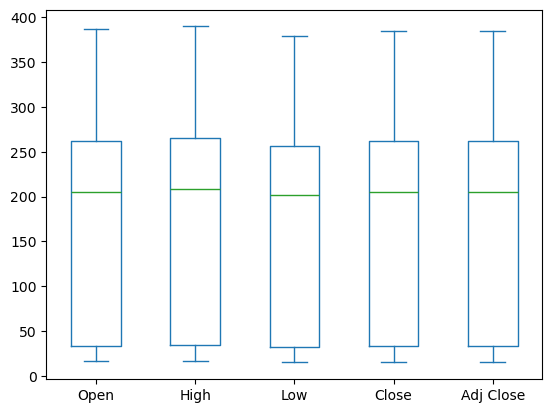

In [11]:
Tesla_data[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

In [13]:
layout = go.Layout(
    title='Stock Prices of Tesla_data',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

In [15]:
Tesla_data_data = [{'x': Tesla_data['Date'], 'y': Tesla_data['Close']}]
plot1 = go.Figure(data=Tesla_data_data, layout=layout)

In [17]:
X = np.array(Tesla_data.index).reshape(-1, 1)
Y = Tesla_data['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [19]:
scaler = StandardScaler().fit(X_train)

In [21]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
trace0 = go.Scatter(x=X_train.T[0], y=Y_train, mode='markers', name='Actual')
trace1 = go.Scatter(x=X_train.T[0], y=lm.predict(X_train).T, mode='lines', name='Predicted')
plot2 = go.Figure(data=[trace0, trace1], layout=layout)
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8658871776828707	0.8610649253244574
MSE       1821.3833862936174	1780.987539418845

